# 2022 Appropriations earmarks

## Python tools and notebook config

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import altair as alt
import altair_stiles as altstiles
import pytz
import seaborn as sns

In [3]:
alt.themes.register("stiles", altstiles.theme)
alt.themes.enable("grid")

ThemeRegistry.enable('grid')

In [4]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 5000
pd.options.display.max_colwidth = None

---

## Party labels

In [5]:
members = pd.read_csv("output/members_of_congress_117.csv")

---

## Read data

In [6]:
src = pd.read_csv(
    "data/processed/house_senate_earmarks_2022.csv", dtype={"amount": int}
)

In [7]:
df = src.fillna("").copy()

---

## Aggregate

#### Agencies

In [8]:
agencies = df.groupby(["agency"]).agg({"amount": ["sum", "size", "mean"]}).reset_index()

In [9]:
agencies.columns = ["_".join(col).strip() for col in agencies.columns.values]

In [10]:
agencies.rename(columns={"agency_": "agency"}, inplace=True)

In [11]:
agencies.sort_values("amount_sum", ascending=False).head()

,agency,amount_sum,amount_size,amount_mean
17,Department of Housing and Urban Development,1515634222,1014,1.494708e+06
19,Department of Transportation,1453832231,478,3.041490e+06
16,Department of Health & Human Services,1221294017,892,1.369164e+06
6,Army Corps of Engineers (Civil),978982000,168,5.827274e+06
21,Environmental Protection Agency,859341095,491,1.750186e+06


In [12]:
agencies["agency"] = (
    agencies["agency"]
    .str.replace("Department of ", "", regex=False)
    .str.replace("the ", "", regex=False)
    .str.replace("Bureau of ", "", regex=False)
)

In [13]:
agencies["amount_mean"] = agencies["amount_mean"].round()

In [14]:
agencies.to_csv("data/processed/2022_earmark_totals_by_agency.csv", index=False)

In [25]:
agencies

,agency,amount_sum,amount_size,amount_mean
0,Agricultural Research Service,62400000,5,12480000.0
1,Air Force,294250000,21,14011905.0
2,Air Force Reserve,41700000,2,20850000.0
3,Air NG,104280000,8,13035000.0
4,Animal and Plant Health Inspection Service,3474000,8,434250.0
5,Army,189296666,15,12619778.0
6,Army Corps of Engineers (Civil),978982000,168,5827274.0
7,Army NG,49790000,7,7112857.0
8,Army Reserve,29200000,1,29200000.0
9,Indian Affairs,1250000,2,625000.0


----

#### Parties

In [40]:
parties = df.groupby(["party"]).agg({"amount": ["sum", "size", "mean"]}).reset_index()

In [41]:
parties.columns = ["_".join(col).strip() for col in parties.columns.values]

In [42]:
parties.rename(columns={"agency_": "agency"}, inplace=True)

In [43]:
parties["amount_mean"] = parties["amount_mean"].round(2)

In [45]:
parties.sort_values("amount_sum", ascending=False).head()

,party_,amount_sum,amount_size,amount_mean
0,D,5370617360,3741,1435610.09
2,R,4021583833,1164,3454968.93
1,I,42548000,64,664812.50


In [44]:
parties.to_csv("data/processed/2022_earmark_totals_by_parties.csv", index=False)

---

## Charts

In [30]:
df_slim = df[["party", "amount", "agency", "origin"]].copy()

In [31]:
sns.set(rc={"figure.figsize": (20, 10)})
sns.set_theme(style="whitegrid")

/Users/stiles/.local/share/virtualenvs/grid-notebooks-Amv9DX-2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


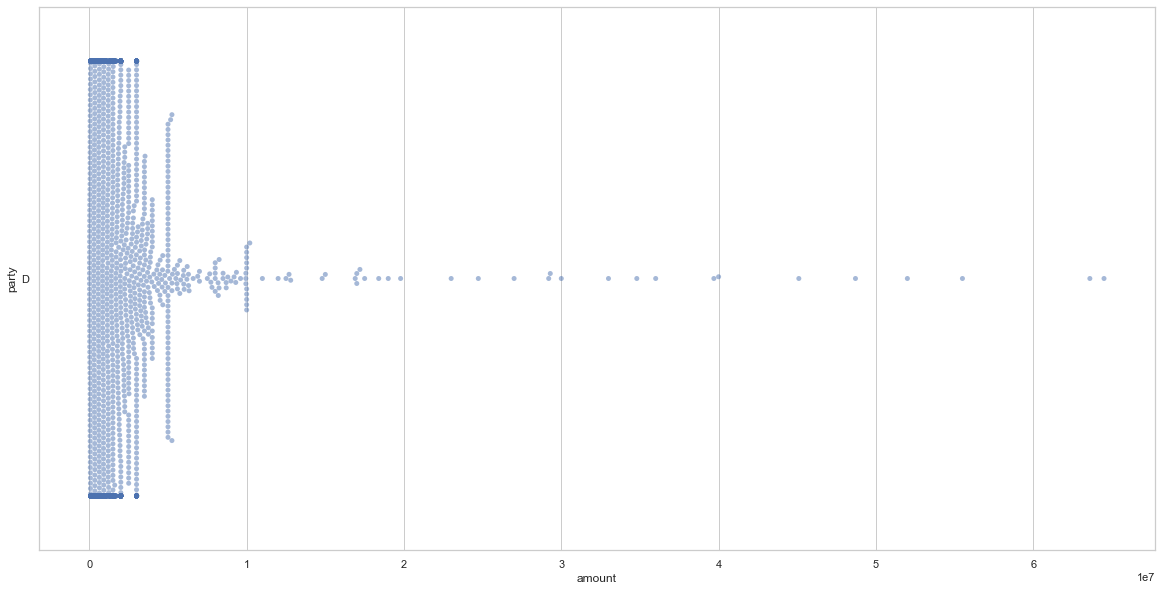

In [32]:
ax = sns.swarmplot(
    y="party", x="amount", data=df_slim[df_slim["party"] == "D"], size=5, alpha=0.5
)